Ejercicio 5
Neural Networks in Keras

In [2]:

import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.nn import relu, softmax
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.backend import clear_session
from livelossplot import PlotLossesKeras
from tensorflow.keras.layers import Dense, Input

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

5 Moons Dataset
Exercise: Use keras and pytorch framework to find a decision boundary for point in the make_moons.

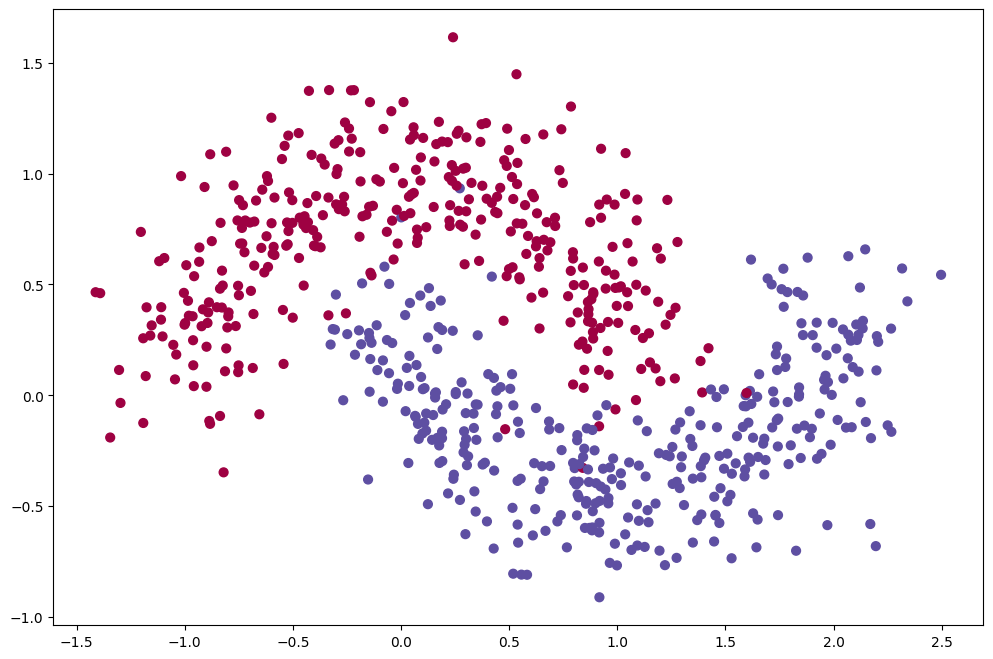

In [3]:
# Create moons dataset.

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], X_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [4]:
#scaler = StandardScaler()

In [5]:
print(y)

[1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0
 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1
 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1
 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1
 1 0 1 1 0 1 1 0 1 1 1 1 

In [6]:
y = to_categorical(y)

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'scaler' is not defined

In [11]:
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='relu'))  # Capa oculta con 5 neuronas y función de activación ReLU
model.add(Dense(1, activation='sigmoid'))  # Capa de salida 

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

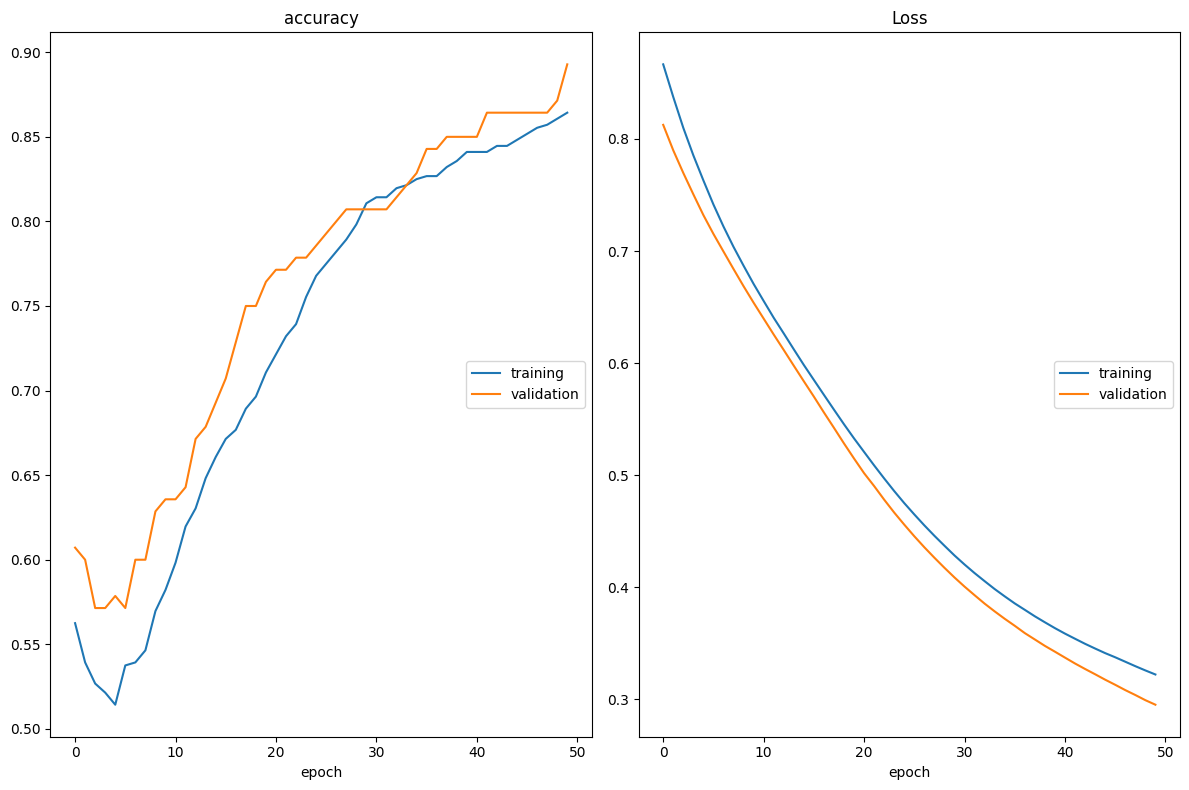

accuracy
	training         	 (min:    0.514, max:    0.864, cur:    0.864)
	validation       	 (min:    0.571, max:    0.893, cur:    0.893)
Loss
	training         	 (min:    0.322, max:    0.867, cur:    0.322)
	validation       	 (min:    0.295, max:    0.813, cur:    0.295)
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8772 - loss: 0.3143 - val_accuracy: 0.8929 - val_loss: 0.2951


In [14]:
moon_model = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2, verbose=1, callbacks=[PlotLossesKeras()])

In [15]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.3663 


[0.34243685007095337, 0.8399999737739563]

5.1 Decision Boundary -- Keras
Exercise: Use keras framework to find a decision boundary for point in the make_moons.

Hint: Use the next function to plt the decision boundary

3507/3507 ━━━━━━━━━━━━━━━━━━━━ 2s 474us/step


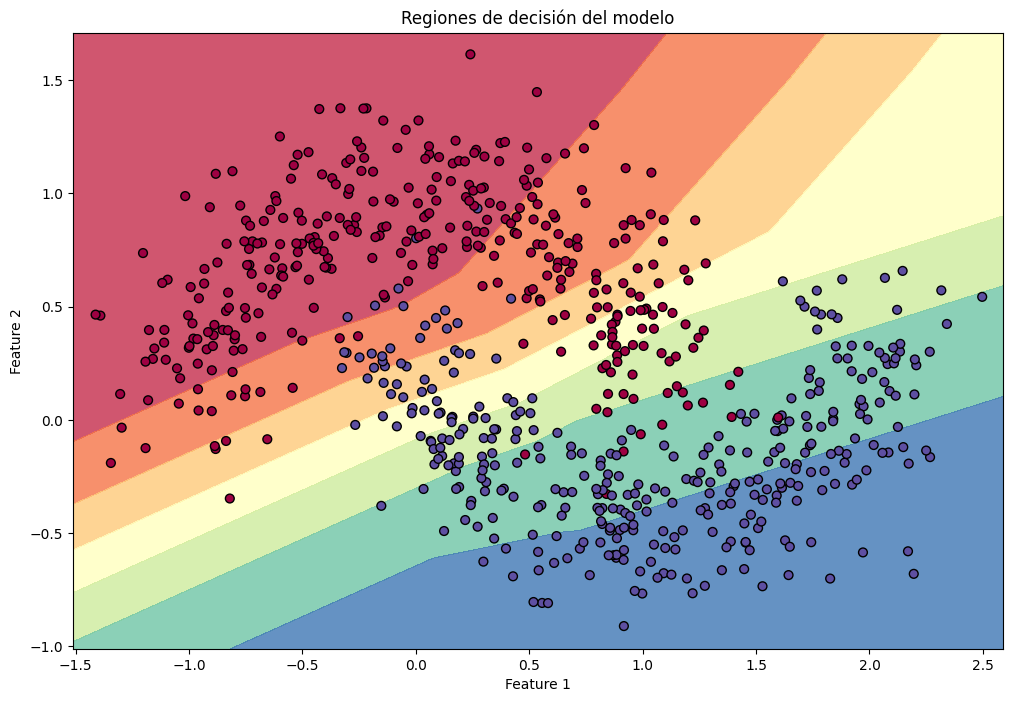

In [16]:
def plot_decision_boundary(model, x, y):
    # Define el rango de valores para la malla
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Genera predicciones para la malla
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)
    
    # Visualiza las regiones de decisión
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, preds, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Regiones de decisión del modelo")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualiza las predicciones del modelo
plot_decision_boundary(model, X_train, y_train)


BatchNormalization y Dropout

In [17]:
# Crear el modelo
model = Sequential()

# Capa de entrada
model.add(Dense(64, input_shape=(2,), activation='relu'))
model.add(BatchNormalization())  # Normaliza las activaciones de la capa anterior
model.add(Dropout(0.5))  # Dropout para regularización

# Capa oculta
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Normaliza las activaciones
model.add(Dropout(0.5))  # Dropout para regularización

# Capa de salida
model.add(Dense(1, activation='sigmoid'))  # Clasificación binaria

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
moon_model1 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5126 - loss: 1.0366 - val_accuracy: 0.8286 - val_loss: 0.6107
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8300 - loss: 0.4219 - val_accuracy: 0.8357 - val_loss: 0.5566
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8314 - loss: 0.3767 - val_accuracy: 0.8643 - val_loss: 0.5294
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8541 - loss: 0.3510 - val_accuracy: 0.9214 - val_loss: 0.5100
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9091 - loss: 0.2477 - val_accuracy: 0.9214 - val_loss: 0.4848
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8756 - loss: 0.3161 - val_accuracy: 0.9500 - val_loss: 0.4678
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9134 - loss: 0.2204 - val_accuracy: 0.9643 - val_loss: 0.4459
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8836 - loss: 0.3364 - val_accuracy: 0.9643 - val_loss:

In [18]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.9763 - loss: 0.0828


[0.078679159283638, 0.9766666889190674]

3507/3507 ━━━━━━━━━━━━━━━━━━━━ 2s 565us/step


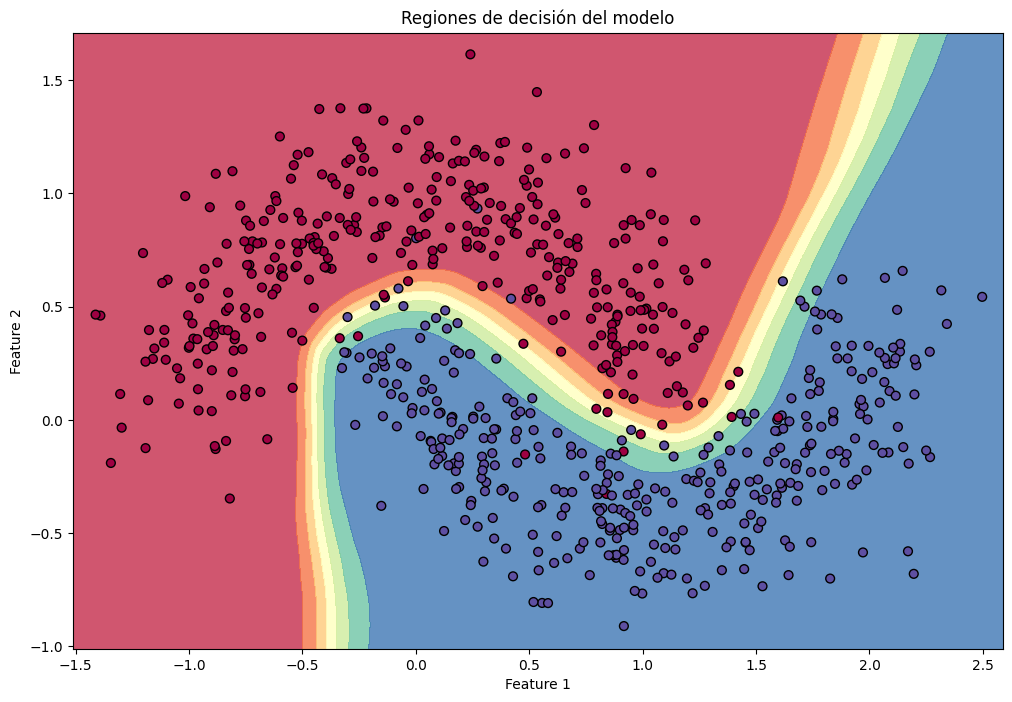

In [19]:
def plot_decision_boundary(model, x, y):
    # Define el rango de valores para la malla
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Genera predicciones para la malla
    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)
    
    # Visualiza las regiones de decisión
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, preds, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Regiones de decisión del modelo")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualiza las predicciones del modelo
plot_decision_boundary(model, X_train, y_train)

In [ ]:
optimizador = model.optimizer

print(f"Optimizador: {optimizador}")

print(f"Nombre del optimizador: {optimizador.get_config()['name']}")

print(f"Parámetros del optimizador: {optimizador.get_config()}")

Optimizador: <keras.src.optimizers.adam.Adam object at 0x000002508A2F99A0>
Nombre del optimizador: adam
Parámetros del optimizador: {'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


In [ ]:
configuracion = model.get_config()
print(configuracion)

{'name': 'sequential_6', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 2), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_2'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_16', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': N